# Exercise notebook 4: Grouping your data

This Jupyter notebook, for Part 4 of The Open University's _Learn to code for Data Analysis_ course, contains code examples and coding activities for you.

You'll come across steps directing you to this notebook. Once you've done each exercise, go back to the corresponding step and mark it as complete. Remember to run the code in this notebook before you start.

In [1]:
%pip install matplotlib
import matplotlib
matplotlib.rcParams['axes.grid'] = True # show gridlines by default

from pandas import *

## Exercise 1: Getting Comtrade data into your notebook

In this exercise, you will practice loading data from Comtrade into a pandas dataframe and getting it into a form where you can start to work with it. 

The following steps and code are an example. Your task for this exercise is stated at the end, after the example.

The data is obtained from the [United Nations Comtrade](http://comtrade.un.org/data/) website, by selecting the following configuration:

- Type of Product: goods
- Frequency: monthly 
- Periods: all of 2014
- Reporter: United Kingdom
- Partners: all
- Flows: imports and exports
- HS (as reported) commodity codes: 0401 (Milk and cream, neither concentrated nor sweetened) and 0402 (Milk and cream, concentrated or sweetened)

Clicking on 'Preview' results in a message that the data exceeds 500 rows. Data was downloaded using the *Download CSV* button and the download file renamed appropriately.

In [2]:
LOCATION='comtrade_milk_uk_monthly_14.csv'

A URL for downloading all the data as a CSV file can also be obtained via "View API Link".
It must be modified so that it returns up to 5000 records (set `max=5000`) in the CSV format (`&fmt=csv`).

In [3]:
# LOCATION = 'http://comtrade.un.org/api/get?max=5000&type=C&freq=M&px=HS&ps=2014&r=826&p=all&rg=1%2C2&cc=0401%2C0402&fmt=csv'

Load the data in from the specified location, ensuring that the various codes are read as strings. Preview the first few rows of the dataset.

In [4]:
milk = read_csv(LOCATION, dtype={'Commodity Code':str, 'Reporter Code':str})
milk.head(3)

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,HS,2014,201401,January 2014,4,0,1,Imports,826,United Kingdom,...,NaN,NaN,NaN,NaN,22404316,NaN,21950747,NaN,NaN,0
1,HS,2014,201401,January 2014,4,0,2,Exports,826,United Kingdom,...,NaN,NaN,NaN,NaN,60497363,NaN,46923551,NaN,NaN,0
2,HS,2014,201401,January 2014,4,0,2,Exports,826,United Kingdom,...,NaN,NaN,NaN,NaN,2520,NaN,3410,NaN,NaN,0


Limit the columns to make the dataframe easier to work with by selecting just a subset of them.

In [5]:
COLUMNS = ['Year', 'Period','Trade Flow','Reporter', 'Partner', 'Commodity','Commodity Code','Trade Value (US$)']
milk = milk[COLUMNS]

Derive two new dataframes that separate out the 'World' partner data and the data for individual partner countries.

In [6]:
milk_world = milk[milk['Partner'] == 'World']
milk_countries = milk[milk['Partner'] != 'World']

You may wish to store a local copy as a CSV file, for example:

In [7]:
milk_countries.to_csv('countrymilk.csv', index=False)

To load the data back in:

In [8]:
load_test = read_csv('countrymilk.csv', dtype={'Commodity Code':str, 'Reporter Code':str})
load_test.head(2)

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
0,2014,201401,Exports,United Kingdom,Afghanistan,"Milk and cream, neither concentrated nor sweet...",0401,3410
1,2014,201401,Exports,United Kingdom,Austria,"Milk and cream, neither concentrated nor sweet...",0401,316


If you are on a Windows computer, data files may sometimes be saved using a file encoding (*Latin-1*). Pandas may not recognise this by default, in which case you will see a `UnicodeDecodeError`.

In such cases, opening files in `read_excel()` or `read_csv()` using the parameter  `encoding="ISO-8859-1"` or  `encoding = "Latin-1"` should fix the problem. For example, edit the previous command to read:

`load_test=read_csv('countrymilk.csv', dtype={'Commodity Code':str}, encoding = "ISO-8859-1")`

### Subsetting Your Data
For large or heterogenous datasets, it is often convenient to create subsets of the data. To further separate out the imports:


In [9]:
milk_imports = milk[milk['Trade Flow'] == 'Imports']
milk_countries_imports = milk_countries[milk_countries['Trade Flow'] == 'Imports']
milk_world_imports=milk_world[milk_world['Trade Flow'] == 'Imports']

### Sorting the data

Having loaded in the data, find the most valuable partners in terms of import trade flow during a particular month by sorting the data by *decreasing* trade value and then selecting the top few rows.

In [10]:
milkImportsInJanuary2014 = milk_countries_imports[milk_countries_imports['Period'] == 201401]
milkImportsInJanuary2014.sort_values('Trade Value (US$)',ascending=False).head(10)

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
23,2014,201401,Imports,United Kingdom,Ireland,"Milk and cream, neither concentrated nor sweet...",0401,10676138
626,2014,201401,Imports,United Kingdom,France,"Milk and cream, concentrated or sweetened",0402,8020014
637,2014,201401,Imports,United Kingdom,Ireland,"Milk and cream, concentrated or sweetened",0402,5966962
650,2014,201401,Imports,United Kingdom,Netherlands,"Milk and cream, concentrated or sweetened",0402,4650774
629,2014,201401,Imports,United Kingdom,Germany,"Milk and cream, concentrated or sweetened",0402,4545873
4,2014,201401,Imports,United Kingdom,Belgium,"Milk and cream, neither concentrated nor sweet...",0401,4472349
612,2014,201401,Imports,United Kingdom,Belgium,"Milk and cream, concentrated or sweetened",0402,3584038
10,2014,201401,Imports,United Kingdom,Denmark,"Milk and cream, neither concentrated nor sweet...",0401,2233438
667,2014,201401,Imports,United Kingdom,Spain,"Milk and cream, concentrated or sweetened",0402,1850097
15,2014,201401,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,1522872


### Task

To complete these tasks you could copy this notebook and amend the code or create a new notebook to do the analysis for your chosen data.

Using the [Comtrade Data website](http://comtrade.un.org/data/), identify a dataset that describes the import and export trade flows for a particular service or form of goods between your country (as reporter) and all ('All') the other countries in the world. Get the monthly data for all months in 2014.

Download the data as a CSV file and add the file to the same folder as the one containing this notebook. Load the data in from the file into a pandas dataframe. Create an easier to work with dataframe that excludes data associated with the 'World' partner. Sort this data to see which countries are the biggest partners in terms of import and export trade flow.

**Now go back to the course.**

## Exercise 2: Grouping data

On many occasions, a dataframe may be organised as groups of rows where the group membership is identified based on cell values within one or more 'key' columns. **Grouping** refers to the process whereby rows associated with a particular group are collated so that you can work with just those rows as distinct subsets of the whole dataset.

The number of groups the dataframe will be split into is based on the number of unique values identified within a single key column, or the number of unique combinations of values for two or more key columns.

The `groupby()` method runs down each row in a data frame, splitting the rows into separate groups based on the unique values associated with the key column or columns.

The following is an example of the steps and code needed to split the dataframe from the Exercise 1 example. 

### Grouping the data

Split the data into two different subsets of data (imports and exports), by grouping on trade flow.

In [11]:
groups = milk_countries.groupby('Trade Flow')

Inspect the first few rows associated with a particular group:

In [12]:
groups.get_group('Imports').head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
4,2014,201401,Imports,United Kingdom,Belgium,"Milk and cream, neither concentrated nor sweet...",0401,4472349
10,2014,201401,Imports,United Kingdom,Denmark,"Milk and cream, neither concentrated nor sweet...",0401,2233438
15,2014,201401,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,1522872
17,2014,201401,Imports,United Kingdom,Germany,"Milk and cream, neither concentrated nor sweet...",0401,1028700
23,2014,201401,Imports,United Kingdom,Ireland,"Milk and cream, neither concentrated nor sweet...",0401,10676138


As well as grouping on a single term, you can create groups based on multiple columns by passing in several column names as a list. For example, generate groups based on commodity code *and* trade flow, and then preview the keys used to define the groups.

In [13]:
GROUPING_COMMFLOW = ['Commodity Code','Trade Flow']

groups = milk_countries.groupby(GROUPING_COMMFLOW)
groups.groups.keys()

dict_keys([('0401', 'Exports'), ('0401', 'Imports'), ('0402', 'Exports'), ('0402', 'Imports')])

Retrieve a group based on multiple group levels by passing in a tuple that specifies a value for each index column. For example, if a grouping is based on the `'Partner'` and `'Trade Flow'` columns, the argument of `get_group` has to be a partner/flow pair, like `('France', 'Import')` to  get all rows associated with imports from France.

In [14]:
GROUPING_PARTNERFLOW = ['Partner','Trade Flow']
groups = milk_countries.groupby(GROUPING_PARTNERFLOW)

GROUP_PARTNERFLOW= ('France','Imports')
groups.get_group( GROUP_PARTNERFLOW )

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
15,2014,201401,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,1522872
68,2014,201402,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,1444455
120,2014,201403,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,1414291
171,2014,201404,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,1912257
223,2014,201405,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,1638838
273,2014,201406,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,1449614
327,2014,201407,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,2096771
370,2014,201408,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,1474883
416,2014,201409,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,1259777
466,2014,201410,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,1483422


To find the leading partner for a particular commodity, group by commodity, get the desired group, and then sort the result.

In [15]:
groups = milk_countries.groupby(['Commodity Code'])
groups.get_group('0402').sort_values("Trade Value (US$)", ascending=False).head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
954,2014,201406,Exports,United Kingdom,Algeria,"Milk and cream, concentrated or sweetened",0402,22411564
880,2014,201405,Exports,United Kingdom,Algeria,"Milk and cream, concentrated or sweetened",0402,19656679
811,2014,201404,Exports,United Kingdom,Algeria,"Milk and cream, concentrated or sweetened",0402,14875816
841,2014,201404,Exports,United Kingdom,Ireland,"Milk and cream, concentrated or sweetened",0402,11712344
773,2014,201403,Exports,United Kingdom,Ireland,"Milk and cream, concentrated or sweetened",0402,11015471


### Task

Using your own data set from Exercise 1, try to group the data in a variety of ways, finding the most significant trade partner in each case:

- by commodity, or commodity code
- by trade flow, commodity and year.

**Now go back to the course.**

## Exercise 3: Experimenting with Split-Apply-Combine – Summary reports

Having learned how to group data using the `groupby()` method, you will now start to put those groups to work.

### Aggregation operations – Generating *Summary* reports

Aggegration operations can be invoked using the `aggregate()` method.

To find the total value of imports traded for each commodity within the period, take the world dataframe, and sum the values over the trade value column within each grouping.

In [16]:
milk_world_imports.groupby('Commodity Code')['Trade Value (US$)'].aggregate(sum)

Commodity Code
0401    222107770
0402    341777173
Name: Trade Value (US$), dtype: int64

So that's 222 million dollars or so on the 0401 commodity, and 341 million dollars or so on 0402.

If you total (sum) up all the individual country contributions, you should get similar amounts.

In [17]:
milk_imports_grouped=milk_countries_imports.groupby('Commodity Code')
milk_imports_grouped['Trade Value (US$)'].aggregate(sum)

Commodity Code
0401    222107771
0402    341777171
Name: Trade Value (US$), dtype: int64

Not far off – there are perhaps a few rounding errors that would account for the odd couple of million that appear to be missing...

### Finding top ranked elements within a group

To find the leading import partners across all the milk products, group by partner, sum (total) the trade value within each group, and then sort the result in descending order before displaying the top few entries.

In [18]:
milk_countries_imports_totals=milk_countries_imports.groupby('Partner')[['Trade Value (US$)']].aggregate(sum)
milk_countries_imports_totals.sort_values('Trade Value (US$)', ascending=False).head()

,Trade Value (US$)
Partner,
Ireland,174315886
France,105008176
Germany,76612700
Netherlands,72209235
Belgium,58338745


### Generating simple charts

One of the useful features of the `aggregate()` method is that it returns an object that can be plotted from directly, in this example a horizontal bar chart.

<AxesSubplot:ylabel='Commodity Code'>

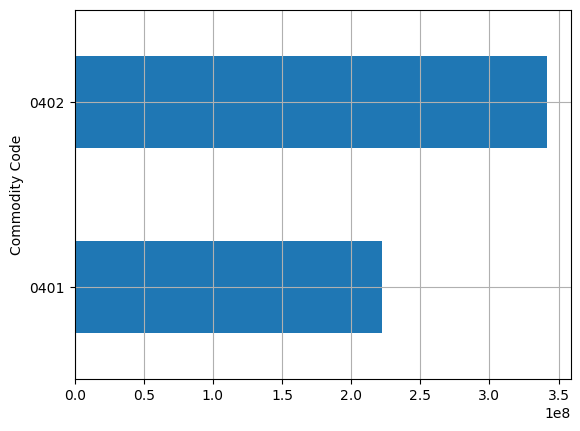

In [19]:
milk_imports_grouped['Trade Value (US$)'].aggregate(sum).plot(kind='barh')

### Generating alternative groupings

Reports can also be generated to show the total imports per month for each commodity: group on commodity, trade flow and period, and then sum the trade values contained within each group.

In [20]:
monthlies=milk_countries_imports.groupby(['Commodity','Trade Flow','Period'])['Trade Value (US$)'].aggregate(sum)
monthlies

Commodity                                           Trade Flow  Period
Milk and cream, concentrated or sweetened           Imports     201401    30423330
                                                                201402    20614513
                                                                201403    26335257
                                                                201404    24770338
                                                                201405    26409462
                                                                201406    29081876
                                                                201407    25668642
                                                                201408    23360790
                                                                201409    37418160
                                                                201410    38012444
                                                                201411    39465351
                

The `groupby()` method *splits* the data into separate distinct groups of rows, and then the `aggregate()` method takes each group of rows from the results of the `groupby()` operation, *applies* the specified aggregation function, and then *combines* the results in the output. 

The aggregation function itself is applied to all columns of an appropriate type. In the example, the only numeric column that makes sense to aggregate over is the trade value column.

As well as built in summary operations, such as finding the total (`sum`), or maximum or minimum value in a group (`max`, `min`), aggregating functions imported from other Python packages can also be used. As shown in the next example, the `numpy` package has a function `mean` that will calculate the mean (simple average) value for a set of values.

### Generating several aggregation values at the same time
To generate several aggregate reports in a single line of code, provide a list of several aggregating operations to the `aggregate()` method:

In [21]:
from numpy import mean

GROUPING_COMMFLOWPERIOD=['Commodity','Trade Flow','Period']
milk_countries.groupby(GROUPING_COMMFLOWPERIOD)['Trade Value (US$)'].aggregate([sum, min, max, mean])

sum  \
Commodity                                          Trade Flow Period             
Milk and cream, concentrated or sweetened          Exports    201401  40215103   
                                                              201402  32298379   
                                                              201403  42987355   
                                                              201404  52900517   
                                                              201405  55987927   
                                                              201406  59594101   
                                                              201407  33370590   
                                                              201408  35080215   
                                                              201409  27320915   
                                                              201410  30387862   
                                                              201411  23417285   
                                                              201412  31301034   
                                                   Imports    201401  30423330   
                                                              201402  20614513   
                                                              201403  26335257   
                                                              201404  24770338   
                                                              201405  26409462   
                                                              201406  29081876   
                                                              201407  25668642   
                                                              201408  23360790   
                                                              201409  37418160   
                                                              201410  38012444   
                                                              201411  39465351   
                                                              201412  20217008   
Milk and cream, neither concentrated nor sweetened Exports    201401  46923551   
                                                              201402  40191337   
                                                              201403  43794069   
                                                              201404  42295261   
                                                              201405  40213208   
                                                              201406  39721799   
                                                              201407  39508126   
                                                              201408  26657488   
                                                              201409  33279378   
                                                              201410  26615555   
                                                              201411  25876673   
                                                              201412  28714207   
                                                   Imports    201401  21950746   
                                                              201402  18685554   
                                                              201403  17984197   
                                                              201404  19440269   
                                                              201405  21665662   
                                                              201406  16022428   
                                                              201407  19128109   
                                                              201408  16934043   
                                                              201409  19284385   
                                                              201410  18353099   
                                                              201411  17617864   
                                                         

By combining different grouping combinations and aggregate functions, you can quickly ask a range of questions over the data or generate a wide variety of charts from it.

Sometimes, however,  it can be quite hard to see any 'outstanding' values in a complex pivot table. In such cases, a chart may help you see which values are significantly larger or smaller than the other values.

For example, plot the maximum value by month across each code/period combination to see which month saw the maximum peak flow of imports from a single partner.

<AxesSubplot:ylabel='Commodity Code,Period'>

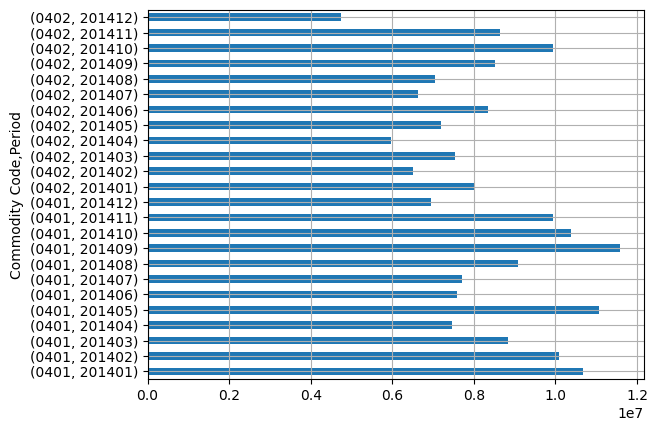

In [22]:
milk_countries_imports.groupby(['Commodity Code','Period'])['Trade Value (US$)'].aggregate(max).plot(kind='barh')

For the 0401 commodity, the largest single monthly trade flow in 2014 appears to have taken place in September (201409). For the 0402 commodity, the weakest month was December, 2014.

To chart the mean trade flows by month, simply aggregate on the *mean* rather than the `max`.

In some cases, you might want to sort the order of the bars in a bar chart by value. By default, the `sort_values()` operator sorts a series or dataframe 'in place'. That is, it sorts the dataframe and doesn't return anything. Use the `inplace=False` parameter to return the sorted values so that the plot function can work on them.

The following chart displays the total imports for the combined commodities by partner (including the *World* partner) for the top five partners: the `sort_values()` element sorts the values in descending order, passes them to the `head()` element, which selects the top five and passes those onto the plotting function.

In [23]:
milk_bypartner_total=milk[milk["Trade Flow"]=='Imports'].groupby(['Partner'])['Trade Value (US$)'].aggregate(sum)
milk_bypartner_total.head(5)

Partner
Austria         798816
Belgium       58338745
Czech Rep.     1254989
Denmark       30534642
Finland             12
Name: Trade Value (US$), dtype: int64

In this case, we don't need to specify the column name when sorting because the aggregation operator returns a *pandas* `Series` and we can sort the values directly:

<AxesSubplot:ylabel='Partner'>

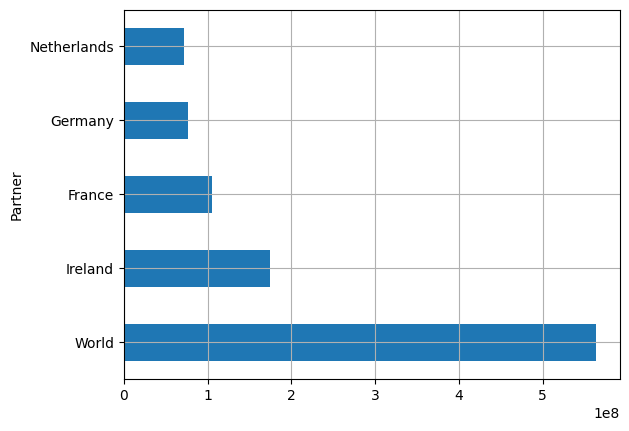

In [24]:
milk_bypartner_total.sort_values(ascending=False, inplace=False).head(5).plot(kind='barh')

### Tasks

For the 0402 trade item, which months saw the greatest average (mean) activity? How does that compare with the maximum flows in each month? How does it compare with the total flow in each month?

Download your own choice of monthly dataset over one or two years containing both import and export data. (To start with, you may find it convenient to split the data into two dataframes, one for exports and one for imports.)

Using your own data:

- find out which months saw the largest total value of imports, or exports? 
- assess, by eye, if there appears to be any seasonal trend in the behaviour of imports or exports?
- plot a bar chart showing the top three importers or exporters of your selected trade item over the period you grabbed the data for, compared to the total world trade value.


**Now go back to the course.**

## Exercise 4: Filtering groups

If you have a large dataset that can be split into multiple groups but for which you only want to report on groups that have a particular property, the `filter()` method can be used to apply a test to a group and only return rows from groups that pass a particular group-wide test. If the test evaluates as `False`, the rows included in that group will be ignored.

Consider the following simple test dataset:

In [25]:
df = DataFrame({'Commodity' : ['Fish', 'Milk', 'Eggs', 'Fish', 'Milk'],
                'Trade Flow' : ['Import', 'Import', 'Import', 'Export','Export'],
                'Value' : [1,2,4,8,16]})
df

,Commodity,Trade Flow,Value
0,Fish,Import,1
1,Milk,Import,2
2,Eggs,Import,4
3,Fish,Export,8
4,Milk,Export,16


One reason for filtering a dataset might be to exclude 'sparse' or infrequently occurring items, such as trade partners who only seem to trade for less than six months of the year.

To select just the groups that contain more than a certain number of rows, define a function to test the length (that is, the number of rows) of each group and return a `True` or `False` value depending on the test.

In the following case, group by trade flow and only return rows from groups containing three or more rows.

In [26]:
def groupsOfThreeOrMoreRows(g):
    return len(g) >= 3

df.groupby('Trade Flow').filter(groupsOfThreeOrMoreRows)

,Commodity,Trade Flow,Value
0,Fish,Import,1
1,Milk,Import,2
2,Eggs,Import,4


You can also select groups based on other group properties. For example, you might select just the groups where the total value for a particular column within a group exceeds a certain threshold.

In the following case, select just those commodities where the sum of import and export values is greater than a certain amount to indicate which ones have a large value of trade, in whatever direction, associated with them. First group by the commodity, then filter on the group property of interest.

In [27]:
def groupsWithValueGreaterThanFive(g):
    return g['Value'].sum() > 5

df.groupby('Commodity').filter(groupsWithValueGreaterThanFive)

,Commodity,Trade Flow,Value
0,Fish,Import,1
1,Milk,Import,2
3,Fish,Export,8
4,Milk,Export,16


### Filtering on the Comtrade data

Now try filtering the Comtrade data relating to the milk imports. Start by creating a subset of the data containing only rows where the total trade value of imports for a particular commodity and partner is greater than $25 million (that is, 25000000).

In [28]:
def groupsWithImportsOver25million(g):
    return g['Trade Value (US$)'].sum() > 25000000

rows=milk_countries_imports.groupby(['Commodity','Partner']).filter(groupsWithImportsOver25million)

Check the filtering by grouping on the commodity and partner and summing the result.

In [29]:
rows.groupby(['Commodity','Partner'])['Trade Value (US$)'].aggregate(sum)

Commodity                                           Partner    
Milk and cream, concentrated or sweetened           Belgium         36155409
                                                    France          85631781
                                                    Germany         59776965
                                                    Ireland         62936247
                                                    Netherlands     61531712
Milk and cream, neither concentrated nor sweetened  Denmark         29432607
                                                    Ireland        111379639
Name: Trade Value (US$), dtype: int64

As before, you can plot the results.

<AxesSubplot:ylabel='Commodity,Partner'>

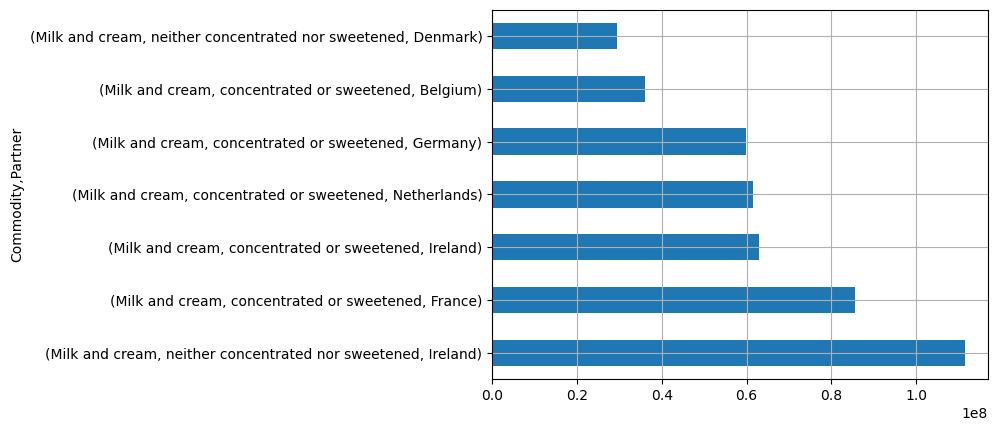

In [30]:
rows.groupby(['Commodity','Partner'])['Trade Value (US$)'].aggregate(sum).sort_values(inplace=False,ascending=False).plot(kind='barh')

Logical tests can be combined in a filter function, for example testing for partners that only appear to trade infrequently *or* for small total amounts in any particular commodity.

In [31]:
def weakpartner(g):
    return len(g)<=3 | g['Trade Value (US$)'].sum()<25000

weak_milk_countries_imports=milk_countries_imports.groupby(['Commodity','Partner']).filter(weakpartner)
weak_milk_countries_imports.groupby(['Commodity','Partner'])[['Trade Value (US$)']].aggregate([len,sum])

Trade Value (US$)  \
                                                                                          len   
Commodity                                          Partner                                      
Milk and cream, concentrated or sweetened          Greece                                   1   
                                                   Hungary                                  8   
                                                   Latvia                                   1   
                                                   Luxembourg                               1   
                                                   New Zealand                              1   
                                                   United Arab Emirates                     2   
                                                   United States of America                 2   
Milk and cream, neither concentrated nor sweetened Finland                                  1   
                                                   Latvia                                   4   
                                                   Spain                                    1   
                                                   Ukraine                                  1   
                                                   United States of America                 1   

                                                                                    
                                                                               sum  
Commodity                                          Partner                          
Milk and cream, concentrated or sweetened          Greece                        7  
                                                   Hungary                    4956  
                                                   Latvia                      432  
                                                   Luxembourg                23724  
                                                   New Zealand               19291  
                                                   United Arab Emirates       5779  
                                                   United States of America   4375  
Milk and cream, neither concentrated nor sweetened Finland                      12  
                                                   Latvia                     1678  
                                                   Spain                        68  
                                                   Ukraine                    3733  
                                                   United States of America   2415

In this report, many of the listed countries appear to have traded in only one or two months; but while Hungary traded concentrated/sweetened products eight times, the total trade value was not very significant at all.

### Tasks

Filter the dataset so that it only contains rows where the total exports across all the milk products for a particular country are at least two million dollars in any given monthly period. (HINT: group on partner and period and filter against a function that tests the minimum trade value exceeds the required value.)

Generate a chart from that dataset that displays the sum total trade value for each partner. (HINT: group on the partner and then aggregate on the sum.)

Using your own monthly data for a single year, which countries only trade in your selected trade item rarely or for small amounts? Which partners trade on a regular basis (for example, in at least nine of the months)? 

Can you also find countries that trade regularly but only for small amounts (for example whose maximum monthly trade value is less than a certain threshold amount) or who trade infrequently but for large amounts (or other combinations thereof)?

**Now go back to the course.**

## Exercise 5: Interactive pivot table

The interactive pivot table contains a fragment of the milk data downloaded from Comtrade relating to the leading partner importers of milk products to the UK. (**Note:** If you can't see the pivot table, check you have downloaded it to the same folder as this notebook and run the cell below.)

Configure the pivot table by dragging the labels into the appropriate row and column selection areas. (You do not need to add all the labels to those areas). Select the aggregation type using the calculation list (which defauts to *count*). Click on the down arrow associated with a label in order to select a subset of values associated with that label.

Use the interactive pivot table to generate reports that display:

- a single column containing the total value of each trade flow for each commodity  each year (in rows: Year, Commodity, Trade Flow; no columns; sum Trade Value(US$))
- for each year and each commodity, a column containing the total trade value by Trade flow (rows: year, commodity; cols Trade Flow; sum trade value)
- the total exports for each partner country (rows) by year (columns). Row: partner, trade flow with filter set to export); col: year; sum trade value

In [32]:
from IPython.display import HTML,IFrame

IFrame('comtrade_pivot.html',width=1000,height=600)


## Task

Try to come up with some of your own questions and then see if you can use the pivot table to answer them.

For example, see if you can use the table to find:

- the total value by partner country of each commodity type (with each row corresponding to a particular country)
- the total value of trade in commodity type for each month of the year
- the leading partners associated with the 0402 commodity code
- the minimum trade value, by month and commodity type, for Ireland.


**Now go back to the course.**

## Exercise 6: Pivot tables with pandas


Pivot tables can be quite hard to understand, so if you want a gentle dataset to pratice with, here is the simple example dataset used in the previous step that you can try out a few pivot table functions on.

In [33]:
#Example dataframe
df = DataFrame({"Commodity":["A","A","A","A","B","B","B","C","C"],
                  "Amount":[10,15,5,20,10,10,5,20,30],
                  "Reporter":["P","P","Q","Q","P","P","Q","P","Q"],
                  "Flow":["X","Y","X","Y","X","Y","X","X","Y"]},
                 columns=["Commodity","Reporter","Flow","Amount"])

df

,Commodity,Reporter,Flow,Amount
0,A,P,X,10
1,A,P,Y,15
2,A,Q,X,5
3,A,Q,Y,20
4,B,P,X,10
5,B,P,Y,10
6,B,Q,X,5
7,C,P,X,20
8,C,Q,Y,30


### Getting started with pivot tables in pandas 

The pandas library provides a `pivot_table()` function into which you can pass the elements needed to define the pivot table view you would like to generate over a particular dataset.

If you inspect the documentation for the pandas `pivot_table()` function, you will see that it is quite involved (but *DON'T PANIC!*).

In [34]:
##Inspect the documentation for the pandas pivot_table() function
##Uncomment the following command (remove the #) and then click the play button in the toolbar to run the cell
#?pivot_table
##The documentation file should pop up from the bottom of the browser.
##Click the x to close it.

You can start to use the pivot table quite straightforwardly, drawing inspiration from the way you configured the interactive pivot table. The function itself takes the form:

`pd.pivot_table(DATAFRAME,
                index= (LIST_OF_)DATA_COLUMN(S)_THAT_DEFINE_PIVOT_TABLE_ROWS,
                columns= (LIST_OF_)DATA_COLUMN(S)_THAT_DEFINE_PIVOT_TABLE_COLUMNS
                values= DATA_COLUMN_TO_APPLY_THE SUMMARYFUNCTION_TO,
                aggfunc=sum
               )`


You can generate a pivot table that shows the total trade value as a single column, grouped into row based subdivisions based on year, country, trade flow and commodity in the following way.

The following pivot table reports on a subset of countries. The `isin()` method selects rows whose partner value 'is in' the list of specified partners.

In [35]:
KEYPARTNERS = ['Belgium','France','Germany','Ireland','Netherlands','Denmark']
milk_keypartners = milk_countries[milk_countries['Partner'].isin(KEYPARTNERS)]

pivot_table(milk_keypartners,
               index=['Year','Partner','Trade Flow','Commodity'],
               values='Trade Value (US$)',
               aggfunc=sum)

Trade Value (US$)
Year Partner     Trade Flow Commodity                                                            
2014 Belgium     Exports    Milk and cream, concentrated or sweetened                     6301229
                            Milk and cream, neither concentrated nor sweetened           23041778
                 Imports    Milk and cream, concentrated or sweetened                    36155409
                            Milk and cream, neither concentrated nor sweetened           22183336
     Denmark     Exports    Milk and cream, concentrated or sweetened                     1849170
                            Milk and cream, neither concentrated nor sweetened            1059287
                 Imports    Milk and cream, concentrated or sweetened                     1102035
                            Milk and cream, neither concentrated nor sweetened           29432607
     France      Exports    Milk and cream, concentrated or sweetened                     9025441
                            Milk and cream, neither concentrated nor sweetened           25597541
                 Imports    Milk and cream, concentrated or sweetened                    85631781
                            Milk and cream, neither concentrated nor sweetened           19376395
     Germany     Exports    Milk and cream, concentrated or sweetened                    24785683
                            Milk and cream, neither concentrated nor sweetened           11310950
                 Imports    Milk and cream, concentrated or sweetened                    59776965
                            Milk and cream, neither concentrated nor sweetened           16835735
     Ireland     Exports    Milk and cream, concentrated or sweetened                    94889874
                            Milk and cream, neither concentrated nor sweetened          326338567
                 Imports    Milk and cream, concentrated or sweetened                    62936247
                            Milk and cream, neither concentrated nor sweetened          111379639
     Netherlands Exports    Milk and cream, concentrated or sweetened                    47518672
                            Milk and cream, neither concentrated nor sweetened           21130410
                 Imports    Milk and cream, concentrated or sweetened                    61531712
                            Milk and cream, neither concentrated nor sweetened           10677523

If you just want to use a single data column from the original dataset to specify the row (that is, the `index`) groupings or the column groupings, you don't need to use a list, just pass in the name of the appropriate original data column.

So, to look at rows grouped by year, country and commodity, and split columns out by trade flow:

In [36]:
#For convenience, let's assign the output of this pivot table operation to a variable...
report = pivot_table(milk_keypartners,
               index=['Year','Partner','Commodity'],
               columns='Trade Flow',
               values='Trade Value (US$)',
               aggfunc=sum)

#And then display the result, sorted by import value
report.sort_values('Imports', ascending=False)

Trade Flow                                                             Exports  \
Year Partner     Commodity                                                       
2014 Ireland     Milk and cream, neither concentrated nor sweetened  326338567   
     France      Milk and cream, concentrated or sweetened             9025441   
     Ireland     Milk and cream, concentrated or sweetened            94889874   
     Netherlands Milk and cream, concentrated or sweetened            47518672   
     Germany     Milk and cream, concentrated or sweetened            24785683   
     Belgium     Milk and cream, concentrated or sweetened             6301229   
     Denmark     Milk and cream, neither concentrated nor sweetened    1059287   
     Belgium     Milk and cream, neither concentrated nor sweetened   23041778   
     France      Milk and cream, neither concentrated nor sweetened   25597541   
     Germany     Milk and cream, neither concentrated nor sweetened   11310950   
     Netherlands Milk and cream, neither concentrated nor sweetened   21130410   
     Denmark     Milk and cream, concentrated or sweetened             1849170   

Trade Flow                                                             Imports  
Year Partner     Commodity                                                      
2014 Ireland     Milk and cream, neither concentrated nor sweetened  111379639  
     France      Milk and cream, concentrated or sweetened            85631781  
     Ireland     Milk and cream, concentrated or sweetened            62936247  
     Netherlands Milk and cream, concentrated or sweetened            61531712  
     Germany     Milk and cream, concentrated or sweetened            59776965  
     Belgium     Milk and cream, concentrated or sweetened            36155409  
     Denmark     Milk and cream, neither concentrated nor sweetened   29432607  
     Belgium     Milk and cream, neither concentrated nor sweetened   22183336  
     France      Milk and cream, neither concentrated nor sweetened   19376395  
     Germany     Milk and cream, neither concentrated nor sweetened   16835735  
     Netherlands Milk and cream, neither concentrated nor sweetened   10677523  
     Denmark     Milk and cream, concentrated or sweetened             1102035

One of the features of the interactive pivot table you did not explore was its ability to generate bar chart style views over the pivoted data as well as tabulated results. (In fact, this requires a plugin to the pivot table that has not been installed.)

In the same way that you produced charts from pandas dataframes previously, you can visualise the contents of the dataframe produced from the pivot table operation.

<AxesSubplot:ylabel='Year,Partner,Commodity'>

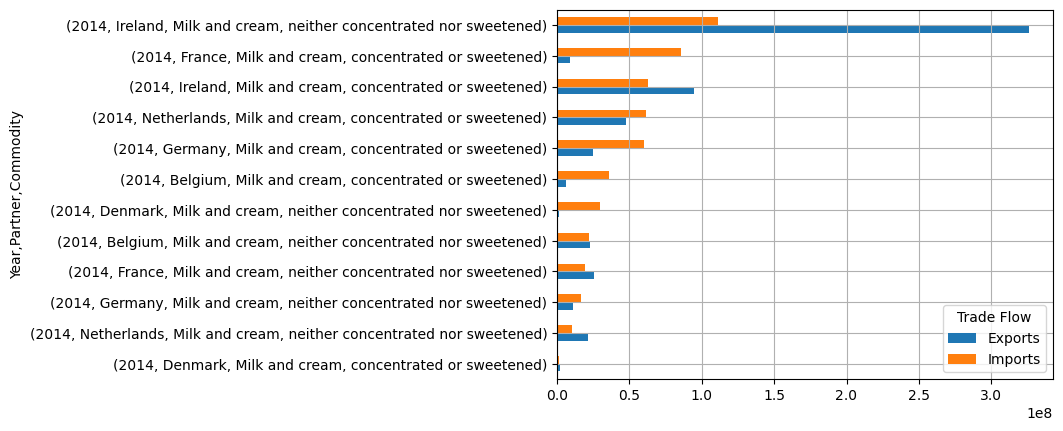

In [37]:
report.sort_values('Imports').plot(kind='barh')

Here, the `.plot()` command produces a *grouped bar chart* with the bars grouped according to the order of the row index values. The values contained within any numerical columns are then displayed as bars.

### Task

Using your own data set containing data for both imports and exports of a particular trade item, see if you can use a pandas pivot table to answer the same questions you asked of your dataset in Exercise 5, as well as asking some new ones.

For example, try to use a pivot table to identify partner countries engaging in 'bi-derectional' trade who have total import values and export values greater than a certain threshold every month.

You can also use a pivot table in combination with other operations. For example, try using one of the filtered datasets you created using the `filter()` function, such as one that limited rows to partners trading above a certain level, as the basis for a pivot table report.

**Now go back to the course.**